In [ ]:
import kagglehub

In [ ]:
path = kagglehub.dataset_download('hrokrin/the-largest-diamond-dataset-currely-on-kaggle')
path

100%|██████████| 4.16M/4.16M [00:00<00:00, 37.4MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/hrokrin/the-largest-diamond-dataset-currely-on-kaggle/versions/1'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

# Reading DataSet

In [ ]:
df = pd.read_csv(path + '/diamonds.csv')
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

# Data Preprocessing

In [ ]:
# Very 1st step - Checking any null values
df.isnull().sum()

,0
Unnamed: 0,0
cut,0
color,0
clarity,0
carat_weight,0
cut_quality,0
lab,0
symmetry,0
polish,0
eye_clean,0


In [ ]:
# 2nd - drop unwanted columns
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [ ]:
# 3rd - identify the unique values
df.nunique()

,0
cut,11
color,11
clarity,11
carat_weight,878
cut_quality,6
lab,3
symmetry,5
polish,5
eye_clean,5
culet_size,9


In [ ]:
# 4th - Checking duplicated rows
df[df.duplicated()]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
111,Round,L,I2,0.31,Very Good,GIA,Very Good,Very Good,unknown,unknown,...,2.75,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,274
238,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,326
240,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,326
241,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,326
276,Round,F,VVS2,0.14,Excellent,IGI,Excellent,Excellent,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219494,Radiant,unknown,VS1,15.95,unknown,GIA,Good,Very Good,unknown,unknown,...,8.57,M,STK,unknown,Faint,Yellow,unknown,NaN,Fancy,378829
219506,Radiant,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,385128
219542,Emerald,K,VS2,15.14,unknown,GIA,Very Good,Excellent,Yes,N,...,7.78,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,420529
219551,Princess,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,431217


In [ ]:
# 5th - Removing duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
lnc = LabelEncoder()

In [ ]:
df_copy = df.copy()

In [ ]:
# 1st method - cat.codes

# for i in df_copy:
#   if df_copy[i].dtype == 'object':
#     print(i)
#     print(df_copy[i].astype('category').cat.codes)

In [ ]:
# 2nd method - LabelEncoder

for i in df_copy:
  r = df_copy[i].dtype
  if r == 'object':
    df_copy[i] = lnc.fit_transform(df_copy[i])
    joblib.dump(lnc, f'{i}.joblib', compress=9)
df_copy

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,7,12,10,7,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,7,12,10,7,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,7,12,10,7,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,7,12,10,7,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,7,12,10,7,9,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,10,1,7,10.65,0,0,0,0,4,3,...,8.66,0,1,5,7,12,10,7,9,1210692
219699,9,10,8,5.17,5,0,4,4,4,8,...,5.71,3,7,5,7,5,10,8,5,1292500
219700,10,1,7,18.07,0,0,0,0,4,3,...,10.20,4,0,5,7,12,10,7,9,1315496
219701,8,10,5,0.90,5,0,2,2,4,3,...,3.47,8,5,5,0,10,10,7,1,1350000


In [ ]:
df_copy.head()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215823 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          215823 non-null  int64  
 1   color                        215823 non-null  int64  
 2   clarity                      215823 non-null  int64  
 3   carat_weight                 215823 non-null  float64
 4   cut_quality                  215823 non-null  int64  
 5   lab                          215823 non-null  int64  
 6   symmetry                     215823 non-null  int64  
 7   polish                       215823 non-null  int64  
 8   eye_clean                    215823 non-null  int64  
 9   culet_size                   215823 non-null  int64  
 10  culet_condition              215823 non-null  int64  
 11  depth_percent                215823 non-null  float64
 12  table_percent                215823 non-null  float64
 13  meas

# Outlier Detection

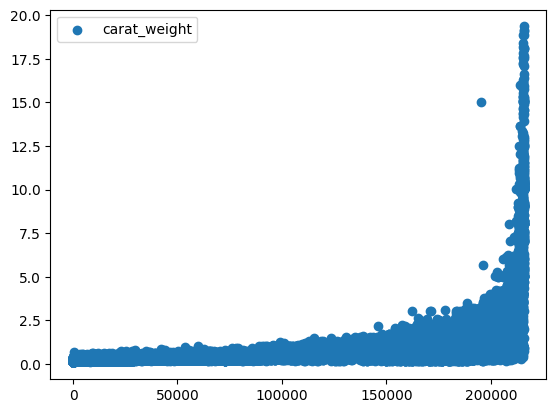

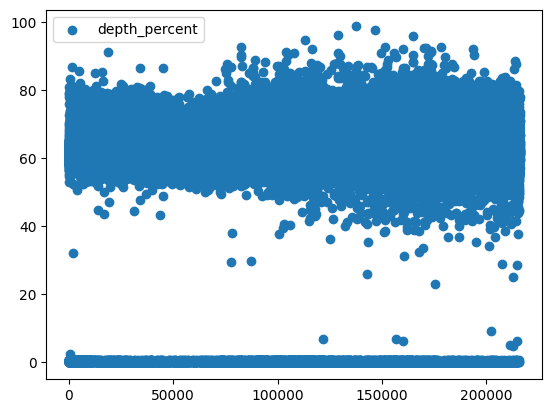

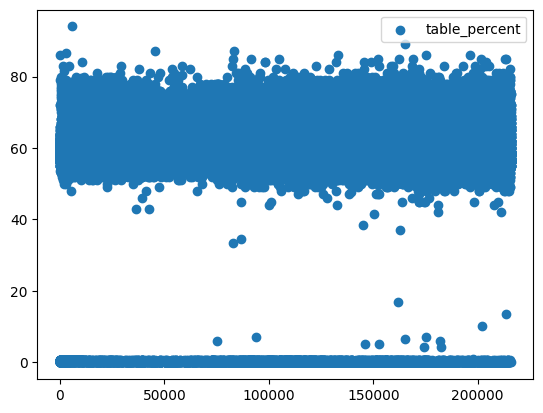

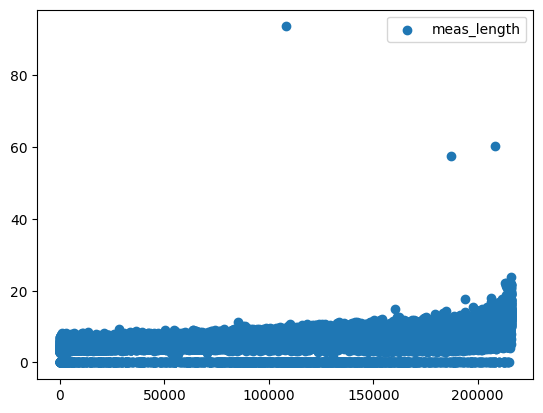

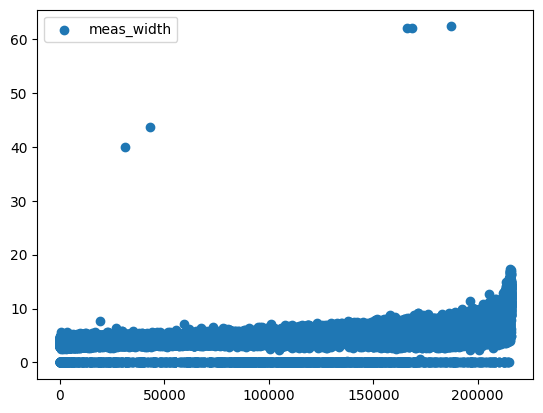

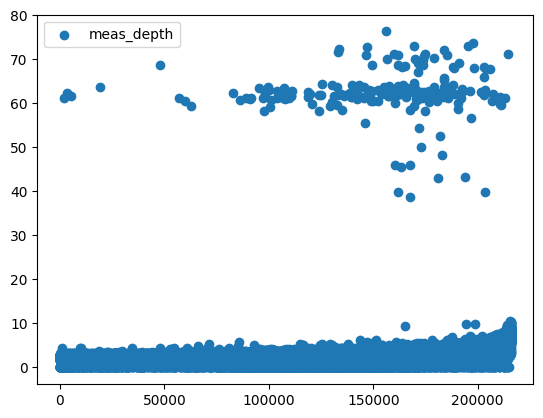

In [ ]:
# we gonna plot each feature variables to under the further analysis
for i in df_copy:
  if df_copy[i].dtype == 'float64':
    plt.scatter(range(len(df_copy[i])), df_copy[i], label=i)
    plt.legend()
    plt.show()

In [ ]:
df_copy = df_copy[df_copy.meas_length < 40]
df_copy = df_copy[df_copy.meas_width < 30]
df_copy = df_copy[df_copy.meas_depth < 30]

# or
# df_copy.drop(df_copy[(df_copy.meas_length < 40) | (df_copy.meas_width < 30) | (df_copy.meas_depth < 30)], inplace=True)

In [ ]:
# check some paramenter which are zero value

df_copy[(df_copy.meas_depth == 0) | (df_copy.meas_length == 0) | (df_copy.meas_width == 0) | (df_copy.depth_percent == 0) | (df_copy.table_percent == 0)]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
24,10,8,0,0.34,0,2,0,0,4,8,...,0.00,9,9,5,7,12,10,7,9,204
25,10,2,9,0.09,0,2,4,4,4,8,...,0.00,9,9,5,7,12,10,7,9,204
26,10,1,9,0.09,4,2,4,4,4,8,...,0.00,9,9,5,4,12,10,7,9,204
44,10,0,7,0.11,0,2,4,0,4,8,...,0.00,9,9,5,7,12,10,7,9,222
45,10,1,7,0.11,0,2,4,4,4,8,...,0.00,9,9,5,7,12,10,7,9,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218830,10,1,4,5.07,0,0,0,4,4,3,...,0.00,9,9,0,1,12,10,7,9,160984
219389,7,10,10,15.52,5,0,4,0,4,8,...,6.34,1,3,5,7,11,1,7,3,302640
219415,10,2,7,6.28,0,0,0,0,4,3,...,7.24,4,4,5,7,12,10,7,9,320733
219530,7,4,7,11.95,5,1,4,0,4,8,...,7.76,1,1,5,1,12,10,7,9,408347


In [ ]:
df2 = df_copy.copy()
df2.drop(df2[(df2.meas_depth == 0) | (df2.meas_length == 0) | (df2.meas_width == 0) | (df2.depth_percent == 0) | (df2.table_percent == 0)].index, inplace=True)

print(df_copy.shape)
print(df2.shape)

(215599, 25)
(210513, 25)


# Feature Selection and Data splitting

<Axes: >

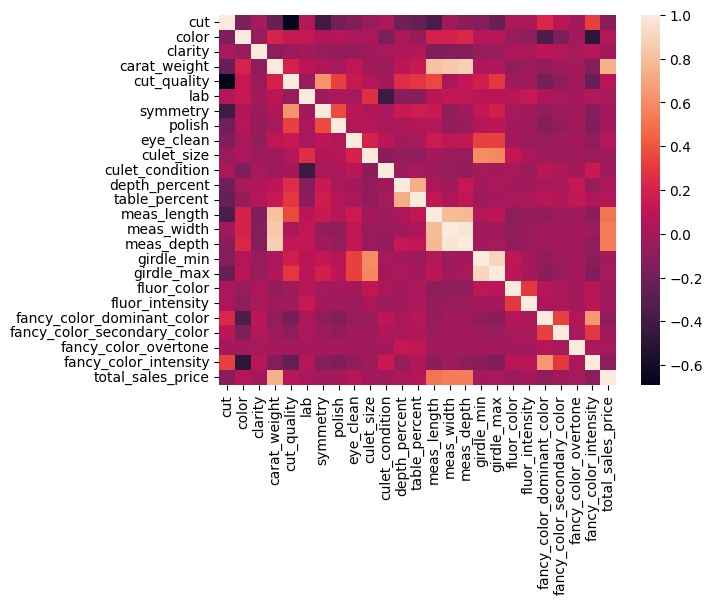

In [ ]:
# quantitative analysis by feature correlation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = MinMaxScaler()

corr = df2.corr()
sns.heatmap(corr)

In [ ]:
(df2.corr()<0).sum()

,0
cut,16
color,9
clarity,13
carat_weight,10
cut_quality,8
lab,5
symmetry,10
polish,11
eye_clean,7
culet_size,13


In [ ]:
X = df2.drop('total_sales_price', axis=1)  # Feature Values
y = df2['total_sales_price']  # Target Values

X.shape, y.shape

((210513, 24), (210513,))

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest as skb

fs = skb(score_func=f_regression, k='all')
fs.fit(X, y)
for i in range(len(fs.scores_)):
  print(f'Features {i} : {fs.scores_[i]}')

Features 0 : 2350.2458248302887
Features 1 : 762.7458345122938
Features 2 : 7.404681099810099
Features 3 : 262560.92284179386
Features 4 : 1256.0603661183757
Features 5 : 51.814592060744985
Features 6 : 15.197575443276662
Features 7 : 0.7552015160088847
Features 8 : 699.8420380477494
Features 9 : 61.59919214636932
Features 10 : 93.90070129506474
Features 11 : 178.0976685103222
Features 12 : 796.5647829578522
Features 13 : 73702.3520068212
Features 14 : 87254.21432062791
Features 15 : 87641.85496118736
Features 16 : 0.24659471139768693
Features 17 : 9.204294845978458
Features 18 : 191.8299584170457
Features 19 : 1.7414751020288877
Features 20 : 1217.8653249528859
Features 21 : 114.29133501284612
Features 22 : 6.8508990432587735
Features 23 : 1492.6022149072685


In [ ]:
#  now select best 15 features

fs = skb(score_func=f_regression, k=15)
X_new = fs.fit_transform(X, y)
f = np.array(df2.drop('total_sales_price', axis=1).columns)
flit = fs.get_support()
f = f[flit]
print(f, len(f))

['cut' 'color' 'carat_weight' 'cut_quality' 'eye_clean' 'culet_condition'
 'depth_percent' 'table_percent' 'meas_length' 'meas_width' 'meas_depth'
 'fluor_color' 'fancy_color_dominant_color' 'fancy_color_secondary_color'
 'fancy_color_intensity'] 15


In [ ]:
print(X.shape, X_new.shape)
y = y.values.reshape(-1,1)

(210513, 24) (210513, 15)


In [ ]:
# Spliting dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=40)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(168410, 15) (42103, 15)
(168410, 1) (42103, 1)


# Modeling the Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
print(f'Intercept : {model.intercept_}')
print(f'Coef : {list(zip(X, model.coef_))}')

Intercept : [56675.30620086]
Coef : [('cut', array([ 6.24497492e+02, -8.02826924e+02,  3.96104716e+04, -1.01321473e+00,
        2.88806332e+02, -1.18912092e+03,  3.26154110e+02, -3.42535241e+02,
       -3.11898703e+03,  4.55586848e+03, -1.96165388e+04,  3.95019012e+01,
       -2.02066171e+03,  1.07918891e+02,  1.91458976e+01]))]


In [ ]:
# Analysing the prediction

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, mae, r2)

247211200.40638992 4015.736727517061 0.6406328590129555


In [ ]:
# Actual Value and Prediction Value

for actual, prediction in zip(y_test, y_pred):
    print("Actual Value: ", actual, "Prediction Value: ", prediction)

Streaming output truncated to the last 5000 lines.
Actual Value:  [770] Prediction Value:  [-351.58050815]
Actual Value:  [622] Prediction Value:  [6155.25492325]
Actual Value:  [1362] Prediction Value:  [-1668.48419287]
Actual Value:  [900] Prediction Value:  [2031.07306652]
Actual Value:  [858] Prediction Value:  [1288.89959658]
Actual Value:  [8547] Prediction Value:  [5868.35719067]
Actual Value:  [3460] Prediction Value:  [-2096.34596482]
Actual Value:  [3677] Prediction Value:  [1775.82880859]
Actual Value:  [6438] Prediction Value:  [7775.4980078]
Actual Value:  [3442] Prediction Value:  [5613.25512831]
Actual Value:  [4704] Prediction Value:  [5860.33936228]
Actual Value:  [1020] Prediction Value:  [3234.16756231]
Actual Value:  [662] Prediction Value:  [3479.64857994]
Actual Value:  [7500] Prediction Value:  [4264.62129327]
Actual Value:  [2098] Prediction Value:  [-1243.62338989]
Actual Value:  [4642] Prediction Value:  [6185.32969862]
Actual Value:  [664] Prediction Value:  